#### Importing necessary libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the dataset and displaying the first few records

In [62]:
df_fico = pd.read_csv(r'C:\Users\Madhumitha\Desktop\fico.csv')
df_fico.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


#### Retrieving the number of rows and columns in the dataset

In [63]:
df_fico.shape

(100013, 2)

This dataset has 100013 rows and 2 columns.

#### Retreiving the non-null count and data type of each column

In [64]:
df_fico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


#### Retrieving the number of null values. 


In [65]:
df_fico.isnull().sum()

acct_id        0
FICO       29615
dtype: int64

There are 29615 missing values!

## TASK 1. You are tasked to explore the FICO dataset. Walk us through your process on the tasks below:
### 1) You need to think about cleaning the data first. Common data problems include duplicates, missing, and errors in the data. Mark rows with data problems as “Missing” in the FICO column.


#### Now I'm replacing the missing values with 'Missing'. 

In [66]:
df_fico.fillna('Missing', inplace = True)
df_fico['FICO'] = np.where(df_fico['FICO'].str.isalpha(), 'Missing',df_fico['FICO'])

df_fico.isnull().sum()

acct_id    0
FICO       0
dtype: int64

We don't have missing values anymore!

In [67]:
df_fico[(df_fico.FICO.str.isalpha()) & (df_fico.FICO != "Missing")]

,acct_id,FICO


In [68]:
# df_fico.drop(df_fico.index[[133, 100011]], inplace = True)


#### Checking the data types of the columns

In [70]:
df_fico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     100013 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [71]:
df_fico['FICO']

0             768
1             850
2             677
3             843
4             796
           ...   
100008    Missing
100009    Missing
100010    Missing
100011    Missing
100012    Missing
Name: FICO, Length: 100013, dtype: object

### 2) Think about what you know about credit score. Segment the FICO scores into 5 groups. Give your reasoning for the bucketing. Display the number of customers and percentage of each segments in your answer, and create a histogram of the distribution if you are using Python.


In [72]:
# conditions = [
#     df_fico['FICO'] == "Missing",
#     (~(df_fico.FICO.str.isalpha()) < 580),
#     (df_fico['FICO'].astype(str).astype(int)) > 579 & (df_fico['FICO'].astype(str).astype(int) <= 670),
#     (df_fico['FICO'].astype(str).astype(int) > 670) & (df_fico['FICO'].astype(str).astype(int) <= 740),
#     (df_fico['FICO'].astype(str).astype(int) > 740) & (df_fico['FICO'].astype(str).astype(int) <= 800),
#     (df_fico['FICO'].astype(str).astype(int) > 800),
#     ]

# # create a list of the values we want to assign for each condition
# values = ['Missing','Poor', 'Average', 'Good', 'Very Good', 'Exceptional']

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['fico_score'] = np.select(conditions, values)

# # display updated DataFrame
# df.head()


2) Think about what you know about credit score. Segment the FICO scores into 5 groups. Give your reasoning for the bucketing. Display the number of customers and percentage of each segments in your answer, and create a histogram of the distribution if you are using Python.


#### Now, I am segmenting the FICO score credit into 5 categories of ratings. According to a resource on the Internet, score credits can be classfied into 5 categories as it helps lenders determine how likely we are to repay a loan.
(https://www.myfico.com/credit-education/what-is-a-fico-score#:~:text=A%20FICO%20Score%20is%20a,are%20to%20repay%20a%20loan.&text=It%20measures%20how%20long%20you,you've%20paid%20on%20time.)

In general, many lenders find scores above 670 as indicating good creditworthiness. Typically, the higher the score, the lower the risk and the more likely creditors are to lend.

<580 indicates that the score is well below the average score of U.S. consumers and demonstrates to lenders that you are a risky borrower.

580-669	indicates that the score is below the average score of U.S. consumers, though many lenders will approve loans with this score.

670-739	indicates that the score is near or slightly above the average of U.S. consumers and most lenders consider this a good score.

740-799	indicates that the score is above the average of U.S. consumers and demonstrates to lenders that you are a very dependable borrower.

800+ indicates that the score is well above the average score of U.S. consumers and clearly demonstrates to lenders that you are an exceptional borrower.

In [73]:
def flag_df(df_fico):
    if df_fico['FICO'] == 'Missing':
        return 'Missing'
#         print('Misssing')
#         df_fico['fico_score_rating'] = 'Missing'
    elif int(df_fico['FICO'] ) < 580:
        return 'Poor'
#         print("580")
#         df_fico['fico_score_rating'] = 'Poor'
    elif  ((int(df_fico['FICO'] ) >= 580) & (int(df_fico['FICO'] ) < 670)):
        return 'Average'
#         print("670")
#         df_fico['fico_score_rating'] = 'Average'
    elif  ((int(df_fico['FICO'] ) >= 670) & (int(df_fico['FICO'] ) < 740)):
        return 'Good'
#         print("740")
#         df_fico['fico_score_rating'] = 'Good'
    elif  ((int(df_fico['FICO'] ) >= 740) & (int(df_fico['FICO'] ) < 800)):
        return 'Very Good'
#         print("800")
#         df_fico['fico_score_rating'] = 'Very Good'
    elif  (int(df_fico['FICO'] ) >= 800):
        return 'Exceptional'
#         print(">800")
#         df_fico['fico_score_rating'] = 'Exceptional'


In [74]:
#applying the function to the dataset
df_fico['fico_score_rating'] = df_fico.apply(flag_df, axis = 1)


In [75]:
df_fico.head()

,acct_id,FICO,fico_score_rating
0,1,768,Very Good
1,2,850,Exceptional
2,3,677,Good
3,4,843,Exceptional
4,5,796,Very Good


#### Histogram Visualization with Percentage Value

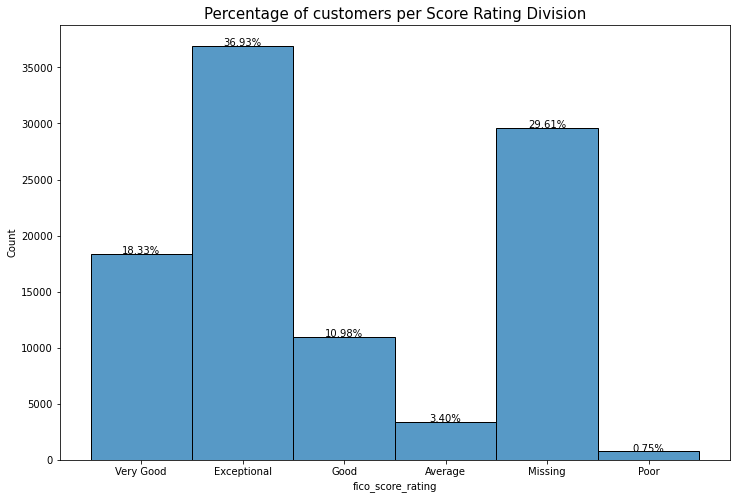

In [90]:
plt.figure(figsize = (12,8))
ax = sns.histplot(x = df_fico['fico_score_rating'])
plt.title("Percentage of customers per Score Rating Division", fontsize = 15)

#placing the percentage value in the histogram
total = float(len(df_fico))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3, '{:.2%}'.format(height/total), ha="center") 
plt.show()

In [77]:
print("Number of customers per score rating:")
df_fico.fico_score_rating.value_counts()

Number of customers per score rating:


Exceptional    36933
Missing        29617
Very Good      18333
Good           10979
Average         3398
Poor             753
Name: fico_score_rating, dtype: int64

### 3) Do you notice anything particular about this distribution? Do you think this reflects what’s happening in the real world?


The percentage distribution seems to be in a descending fashion according to the rating scale, which tells us that majority cusomters have high creditworthiness. These derived results seem to indicate that more than half of the customers seem to have a rating of 800+ which indicates that they are most likely to repay their loan and hence can help them lower chances of having a high loan interest. Less than 1000 customers have a score of Poor which depicts that creditors are least likely to lend to them. 

## TASK 2: Now that you have a clean dataset for FICO. Create a temp table to store the information of FICO score and region for each customer. Make sure the customer id is the same for each record. Display the regions which have the second highest and lowest average FICO score. The result of your query should display only two rows showing the region and its average FICO score. Make sure you provide all the interim steps if needed in your final submission.


In [78]:
#loading the region dataset
df_region = pd.read_csv(r'C:\Users\Madhumitha\Desktop\region.csv')
df_region.head()

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia


#### Merging the 2 datasets 

In [79]:
#merging the 2 datasets using inner join using accound id as the common column
df = pd.merge(df_fico, df_region, on = "acct_id", how = "inner")
df.head()

,acct_id,FICO,fico_score_rating,region
0,1,768,Very Good,New York
1,2,850,Exceptional,Dallas
2,3,677,Good,Los Angeles
3,4,843,Exceptional,Chicago
4,5,796,Very Good,Philadelphia


In [80]:
df

,acct_id,FICO,fico_score_rating,region
0,1,768,Very Good,New York
1,2,850,Exceptional,Dallas
2,3,677,Good,Los Angeles
3,4,843,Exceptional,Chicago
4,5,796,Very Good,Philadelphia
...,...,...,...,...
100181,99996,Missing,Missing,Chicago
100182,99997,Missing,Missing,New York
100183,99998,Missing,Missing,San Diego
100184,99999,Missing,Missing,Chicago


Now, I have to group the dataset by region, which basically means I have to gather the count of regions. For that, I need numeric values for counting. But, the dataset has several rows which have the string "Missing" in place of actual missing/wrong data. Hence, I have to drop the missing values in order to proceed with only numeric values for the grouping. 

In [81]:
#removing columns which have Missing as data

df = df[df.FICO != "Missing"]
df

,acct_id,FICO,fico_score_rating,region
0,1,768,Very Good,New York
1,2,850,Exceptional,Dallas
2,3,677,Good,Los Angeles
3,4,843,Exceptional,Chicago
4,5,796,Very Good,Philadelphia
...,...,...,...,...
100171,99986,836,Exceptional,Phoenix
100172,99987,850,Exceptional,Los Angeles
100174,99989,850,Exceptional,Los Angeles
100175,99990,830,Exceptional,Chicago


In [82]:
#grouping using the groupby function and getting the mean of FICO
group = df.groupby('region').mean()
group

,acct_id
region,
Charlotte,50320.351572
Chicago,49715.979795
Dallas,50248.634126
Houston,50403.689499
Los Angeles,50400.585609
New York,50166.915877
Philadelphia,50413.253596
Phoenix,50969.407724
San Antonio,50401.320351


We got the mean of acct_id instead of FICO! Looks like there was some problem in calculating the mean. Let me check the data type of the FICO column.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70569 entries, 0 to 100177
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   acct_id            70569 non-null  int64 
 1   FICO               70569 non-null  object
 2   fico_score_rating  70569 non-null  object
 3   region             70569 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


The datatype is object, that is why mean could not be calculated. So, I'll convert to integer data type.

In [84]:
df["FICO"] = pd.to_numeric(df["FICO"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70569 entries, 0 to 100177
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   acct_id            70569 non-null  int64 
 1   FICO               70569 non-null  int64 
 2   fico_score_rating  70569 non-null  object
 3   region             70569 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


<ipython-input-84-b9870e44a148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FICO"] = pd.to_numeric(df["FICO"])


In [85]:
#grouping region-wise and calucating the mean and ordering in descending order
group = df.groupby('region').mean()
group = group.sort_values('FICO', ascending = False)
group

,acct_id,FICO
region,,
Phoenix,50969.407724,788.156762
Houston,50403.689499,786.007501
Philadelphia,50413.253596,785.783084
Los Angeles,50400.585609,785.694113
Chicago,49715.979795,785.638187
Charlotte,50320.351572,785.154280
New York,50166.915877,785.081154
San Antonio,50401.320351,784.508277
San Diego,49570.958831,784.081618


The task mentions that only the region and FICO should be displayed so I am dropping the acc_id column.

In [86]:
#dropping the acct_id column
group.drop(columns = 'acct_id', inplace = True)
group

,FICO
region,
Phoenix,788.156762
Houston,786.007501
Philadelphia,785.783084
Los Angeles,785.694113
Chicago,785.638187
Charlotte,785.154280
New York,785.081154
San Antonio,784.508277
San Diego,784.081618
